In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



In [ ]:
data=pd.read_csv('./data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# drop id column as it is an identifier and 'Unnamed: 32' which is often a placeholder/empty column.
columns_to_drop = ['id']
if 'Unnamed: 32' in data.columns:
    columns_to_drop.append('Unnamed: 32')

data = data.drop(columns=columns_to_drop, axis=1, errors='ignore')

In [ ]:
# missing values check
if data.isnull().values.any():
    print("missing values found applying mean imputation")
    imputer = SimpleImputer(strategy='mean')
    # impute only the numerical features
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    data[numerical_cols] = imputer.fit_transform(data[numerical_cols])
else:
    print("no missing values found")

no missing values found


In [ ]:
# convert 'diagnosis' (Target) from categorical ('M', 'B') to numerical (1, 0)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# separate features (X) (30 columns) from the target (y)
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

In [ ]:
# data splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [ ]:
# Feature Scaling
scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

INPUT_DIM = X_train_scaled.shape[1]
print(f"Train={len(X_train)} samples, Test={len(X_test)} samples.")

Train=455 samples, Test=114 samples.


In [ ]:
K = 5
classifier = KNeighborsClassifier(
    n_neighbors=K,
    weights='uniform',
    p=2, # Euclidean Distance
    algorithm='auto'
)
model_name = f"KNN (K={K})"
classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test_scaled)


--- KNN (K=5) Performance Metrics (Test Set) ---
Accuracy: 0.9561
Precision: 0.9744
Recall: 0.9048
F-measure (F1-score): 0.9383


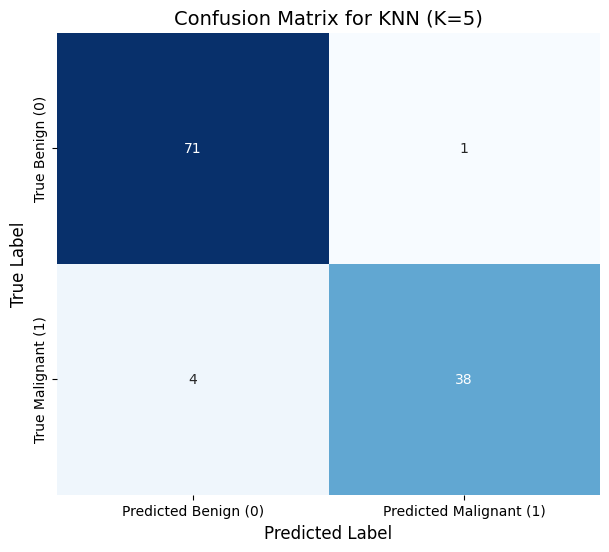


Key Confusion Matrix Counts:
  True Positives (TP): 38
  False Negatives (FN - Type II Error): 4


In [ ]:
# Performance Metrics Reporting
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"\n--- {model_name} Performance Metrics (Test Set) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F-measure (F1-score): {f1:.4f}")

# Plot Confusion Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Predicted Benign (0)', 'Predicted Malignant (1)'],
    yticklabels=['True Benign (0)', 'True Malignant (1)']
)
plt.title(f'Confusion Matrix for {model_name}', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

print("\nKey Confusion Matrix Counts:")
print(f"  True Positives (TP): {conf_matrix[1, 1]}")
print(f"  False Negatives (FN - Type II Error): {conf_matrix[1, 0]}")

In [ ]:
def create_chromosome(input_dim):
    """
    Generates a single binary chromosome.

    Args:
        input_dim (int): The length of the chromosome, corresponding to the number of features.

    Returns:
        np.ndarray: A NumPy array of binary values (0 or 1).
    """
    return np.random.randint(0, 2, input_dim)

# Example usage:
example_chromosome = create_chromosome(INPUT_DIM)
print(f"Example chromosome (length {len(example_chromosome)}):\n{example_chromosome}")

Example chromosome (length 30):
[1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 0 1]


In [ ]:
population = []
POPULATION_SIZE = 30
for _ in range(POPULATION_SIZE):
    chromosome = create_chromosome(INPUT_DIM)
    population.append(chromosome)

print(f"Generated an initial population of {len(population)} chromosomes.")
print(f"Example chromosome from population (length {len(population[0])}):\n{population[0]}")

Generated an initial population of 30 chromosomes.
Example chromosome from population (length 30):
[1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1]


In [ ]:
def calculate_fitness(chromosome):
    """
    Calculates the fitness of a chromosome by training a KNN classifier
    on the selected features and returning the accuracy.

    Args:
        chromosome (np.ndarray): A binary array representing the feature subset.

    Returns:
        float: The accuracy score of the KNN classifier using the selected features.
    """
    # Identify selected features
    selected_feature_indices = np.where(chromosome == 1)[0]

    # If no features are selected, return 0 fitness
    if len(selected_feature_indices) == 0:
        return 0.0

    # Create new training and testing datasets with selected features
    X_train_subset = X_train_scaled[:, selected_feature_indices]
    X_test_subset = X_test_scaled[:, selected_feature_indices]

    # Instantiate and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=K, weights='uniform', p=2, algorithm='auto')
    knn.fit(X_train_subset, y_train)

    # Make predictions and calculate accuracy
    y_pred_subset = knn.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred_subset)

    return accuracy

# Example usage:
# Evaluate the fitness of an example chromosome from the previously generated population
example_chromosome = population[0]
fitness_score = calculate_fitness(example_chromosome)
print(f"Chromosome: {example_chromosome}")
print(f"Fitness (Accuracy): {fitness_score:.4f}")

Chromosome: [1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1]
Fitness (Accuracy): 0.9211


In [ ]:
def roulette_wheel_selection(population, fitness_scores, num_parents=2):
    """
    Selects parent chromosomes using the roulette wheel selection method.

    Args:
        population (list): A list of chromosomes (np.ndarray).
        fitness_scores (list): A list of fitness scores corresponding to the population.
        num_parents (int): The number of parents to select.

    Returns:
        list: A list of selected parent chromosomes.
    """
    total_fitness = np.sum(fitness_scores)

    if total_fitness == 0:
        # Handle edge case where all fitness scores are zero (e.g., all chromosomes are invalid)
        # Randomly select parents if no fitness can differentiate them
        return [population[np.random.randint(0, len(population))] for _ in range(num_parents)]

    # Calculate selection probabilities
    selection_probabilities = [score / total_fitness for score in fitness_scores]

    # Select parents using np.random.choice
    # The population needs to be converted to an object array for np.random.choice to work correctly with non-scalar items
    selected_indices = np.random.choice(
        len(population),
        size=num_parents,
        p=selection_probabilities,
        replace=True
    )
    selected_parents = [population[i] for i in selected_indices]
    return selected_parents

# Example usage:
# First, calculate fitness for the current population
current_fitness_scores = [calculate_fitness(chromosome) for chromosome in population]

# Select two parents using roulette wheel selection
selected_parents = roulette_wheel_selection(population, current_fitness_scores, num_parents=2)

print(f"Selected Parent A (length {len(selected_parents[0])}):\n{selected_parents[0]}")
print(f"Selected Parent B (length {len(selected_parents[1])}):\n{selected_parents[1]}")


Selected Parent A (length 30):
[0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1]
Selected Parent B (length 30):
[0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0]


In [ ]:
def single_point_crossover(parent1, parent2):
    """
    Performs single-point crossover between two parent chromosomes.

    Args:
        parent1 (np.ndarray): The first parent chromosome.
        parent2 (np.ndarray): The second parent chromosome.

    Returns:
        tuple: A tuple containing two offspring chromosomes (np.ndarray, np.ndarray).
    """
    # Ensure parents have the same length
    if len(parent1) != len(parent2):
        raise ValueError("Parent chromosomes must have the same length.")

    chromosome_length = len(parent1)

    # Generate a random crossover point (excluding the first and last genes)
    # This ensures that at least one gene is swapped and prevents trivial crossovers
    if chromosome_length <= 1:
        return parent1.copy(), parent2.copy() # No valid crossover point, return copies
    crossover_point = np.random.randint(1, chromosome_length - 1)

    # Create offspring by swapping genetic material
    offspring1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    offspring2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))

    return offspring1, offspring2

# Example usage with previously selected parents:
parent_a = selected_parents[0]
parent_b = selected_parents[1]

# Perform crossover
offspring_a, offspring_b = single_point_crossover(parent_a, parent_b)

print(f"Parent A:\n{parent_a}")
print(f"Parent B:\n{parent_b}")
print(f"Crossover point was determined dynamically by the function.\n")
print(f"Offspring A:\n{offspring_a}")
print(f"Offspring B:\n{offspring_b}")

Parent A:
[0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1]
Parent B:
[0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0]
Crossover point was determined dynamically by the function.

Offspring A:
[0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0]
Offspring B:
[0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1]


In [ ]:
def mutate_chromosome(chromosome, mutation_rate):
    """
    Mutates a chromosome by flipping genes with a given probability.

    Args:
        chromosome (np.ndarray): The chromosome to mutate.
        mutation_rate (float): The probability of flipping a gene.

    Returns:
        np.ndarray: The mutated chromosome.
    """
    mutated_chromosome = chromosome.copy()
    for i in range(len(mutated_chromosome)):
        if np.random.rand() < mutation_rate:
            mutated_chromosome[i] = 1 - mutated_chromosome[i]  # Flip 0 to 1, or 1 to 0
    return mutated_chromosome

# Example usage:
# Let's use one of the offspring from the previous step as an example
original_chromosome = offspring_a.copy()
mutation_r = 0.05  # Example mutation rate

mutated_chromosome = mutate_chromosome(original_chromosome, mutation_r)

print(f"Original Chromosome:\n{original_chromosome}")
print(f"Mutated Chromosome (with mutation rate={mutation_r}):\n{mutated_chromosome}")

# Verify if any mutation occurred (optional)
if not np.array_equal(original_chromosome, mutated_chromosome):
    print("Mutation occurred!")
else:
    print("No mutation occurred in this example (due to random chance).")

Original Chromosome:
[0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0]
Mutated Chromosome (with mutation rate=0.05):
[0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 1 0 0]
Mutation occurred!


In [ ]:
# 1. Define parameters for the genetic algorithm
GA_POPULATION_SIZE = 50
GA_GENERATIONS = 10
GA_CROSSOVER_RATE = 0.8
GA_MUTATION_RATE = 0.05

# 2. Initialize the population
population = []
for _ in range(GA_POPULATION_SIZE):
    chromosome = create_chromosome(INPUT_DIM)
    population.append(chromosome)

# 3. Create lists to store best fitness and chromosomes across generations
best_fitness_scores_per_generation = []
best_chromosomes_per_generation = []

# Initialize overall best
overall_best_chromosome = None
overall_best_fitness = -1.0

# 4. Start a loop for GA_GENERATIONS
print("Starting Genetic Algorithm...")
for generation in range(GA_GENERATIONS):
    # a. Calculate fitness_scores for all chromosomes in the current population
    fitness_scores = [calculate_fitness(chromosome) for chromosome in population]

    # b. Identify and store the best_chromosome_in_generation and its best_fitness_in_generation
    best_fitness_in_generation = -1.0
    best_chromosome_in_generation = None

    # Handle cases where fitness_scores might be empty or all zero
    if fitness_scores and max(fitness_scores) > 0:
        max_fitness_index = np.argmax(fitness_scores)
        best_fitness_in_generation = fitness_scores[max_fitness_index]
        best_chromosome_in_generation = population[max_fitness_index]
    else:
        # If all fitness scores are 0 or list is empty, pick a random chromosome to avoid errors
        if population:
            best_chromosome_in_generation = population[np.random.randint(0, len(population))]
            best_fitness_in_generation = calculate_fitness(best_chromosome_in_generation) # Recalculate if it was 0
        else:
            # If population is empty, create a random chromosome
            best_chromosome_in_generation = create_chromosome(INPUT_DIM)
            best_fitness_in_generation = calculate_fitness(best_chromosome_in_generation)


    best_fitness_scores_per_generation.append(best_fitness_in_generation)
    best_chromosomes_per_generation.append(best_chromosome_in_generation)

    # Update overall best chromosome and fitness
    if best_fitness_in_generation > overall_best_fitness:
        overall_best_fitness = best_fitness_in_generation
        overall_best_chromosome = best_chromosome_in_generation

    print(f"Generation {generation + 1}/{GA_GENERATIONS}: Best Fitness = {best_fitness_in_generation:.4f}")

    # c. Use roulette_wheel_selection to select parents for the next generation
    next_generation = []
    for _ in range(GA_POPULATION_SIZE // 2): # Select pairs for crossover
        parent1, parent2 = roulette_wheel_selection(population, fitness_scores, num_parents=2)

        # d. Create the next_generation population by applying single_point_crossover and mutate_chromosome
        # Crossover
        if np.random.rand() < GA_CROSSOVER_RATE:
            offspring1, offspring2 = single_point_crossover(parent1, parent2)
        else:
            offspring1, offspring2 = parent1.copy(), parent2.copy()

        # Mutation
        offspring1 = mutate_chromosome(offspring1, GA_MUTATION_RATE)
        offspring2 = mutate_chromosome(offspring2, GA_MUTATION_RATE)

        next_generation.extend([offspring1, offspring2])

    # e. Ensure the next_generation reaches GA_POPULATION_SIZE (handle odd population sizes or rounding issues)
    while len(next_generation) < GA_POPULATION_SIZE:
        # Add more individuals, e.g., by selecting the best from current generation or random
        if best_chromosome_in_generation is not None:
            next_generation.append(best_chromosome_in_generation.copy()) # Elitism
        else:
            next_generation.append(create_chromosome(INPUT_DIM)) # Random if no best yet

    # Truncate if too many (due to elitism or rounding)
    population = next_generation[:GA_POPULATION_SIZE]


print("Genetic Algorithm Finished.")

# 5. After the loop, identify the overall best_feature_subset and its best_subset_fitness
# (This is already tracked by overall_best_chromosome and overall_best_fitness)

# 6. Print the details of the overall best feature subset.
print("\n--- Genetic Algorithm Results ---")
print(f"Overall Best Fitness (Accuracy): {overall_best_fitness:.4f}")
print(f"Overall Best Feature Subset (chromosome):\n{overall_best_chromosome}")

# Optional: Identify the names of the selected features
if overall_best_chromosome is not None:
    selected_feature_indices_ga = np.where(overall_best_chromosome == 1)[0]
    # Assuming X is the original DataFrame of features before scaling
    selected_feature_names_ga = X.columns[selected_feature_indices_ga].tolist()
    print(f"Number of selected features: {len(selected_feature_names_ga)}")
    print(f"Selected Feature Names: {selected_feature_names_ga}")

Starting Genetic Algorithm...
Generation 1/10: Best Fitness = 0.9737
Generation 2/10: Best Fitness = 0.9737
Generation 3/10: Best Fitness = 0.9825
Generation 4/10: Best Fitness = 0.9825
Generation 5/10: Best Fitness = 0.9825
Generation 6/10: Best Fitness = 0.9825
Generation 7/10: Best Fitness = 0.9825
Generation 8/10: Best Fitness = 0.9825
Generation 9/10: Best Fitness = 0.9825
Generation 10/10: Best Fitness = 0.9825
Genetic Algorithm Finished.

--- Genetic Algorithm Results ---
Overall Best Fitness (Accuracy): 0.9825
Overall Best Feature Subset (chromosome):
[1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1]
Number of selected features: 15
Selected Feature Names: ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'area_se', 'compactness_se', 'concavity_se', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concave points_worst', 'fractal_dimension_worst']


In [ ]:
print("\n--- Evaluating Best Feature Subset ---\n")

# 1. Identify the indices of the selected features from the overall_best_chromosome
selected_feature_indices = np.where(overall_best_chromosome == 1)[0]

# 2. Create new training and testing datasets using only these selected features
X_train_final = X_train_scaled[:, selected_feature_indices]
X_test_final = X_test_scaled[:, selected_feature_indices]

# 3. Instantiate a new KNeighborsClassifier
final_knn_model = KNeighborsClassifier(n_neighbors=K, weights='uniform', p=2, algorithm='auto')

# 4. Fit this new KNN classifier to X_train_final and y_train
final_knn_model.fit(X_train_final, y_train)

# 5. Make predictions on X_test_final
y_pred_final = final_knn_model.predict(X_test_final)

# 6. Calculate and print the accuracy_score
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"Accuracy with GA-selected features: {final_accuracy:.4f}")

# 7. Print the list of selected feature names
selected_feature_names = X.columns[selected_feature_indices].tolist()
print(f"Number of selected features: {len(selected_feature_names)}")
print(f"Selected Feature Names: {selected_feature_names}")


--- Evaluating Best Feature Subset ---

Accuracy with GA-selected features: 0.9825
Number of selected features: 15
Selected Feature Names: ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'area_se', 'compactness_se', 'concavity_se', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concave points_worst', 'fractal_dimension_worst']


Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1-score: 0.9756


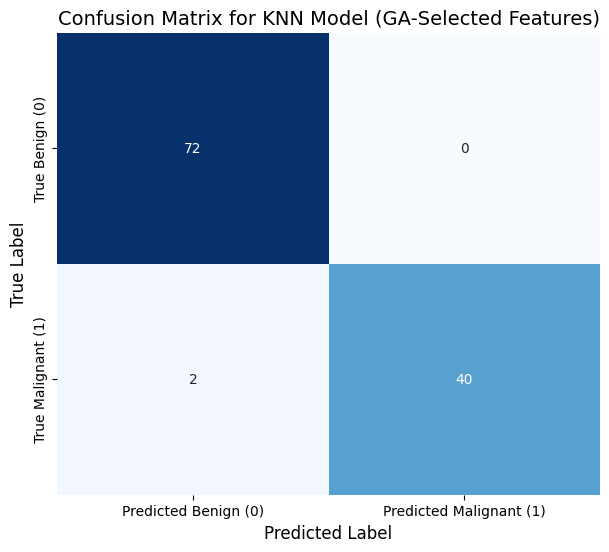


Key Confusion Matrix Counts (for KNN with GA-Selected Features):
  True Positives (TP): 40
  False Negatives (FN - Type II Error): 2
  True Negatives (TN): 72
  False Positives (FP - Type I Error): 0


In [ ]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_final)
precision = precision_score(y_test, y_pred_final)
recall = recall_score(y_test, y_pred_final)
f1 = f1_score(y_test, y_pred_final)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
# Calculate the confusion matrix for the final KNN model
conf_matrix_final = confusion_matrix(y_test, y_pred_final)

# Plot Confusion Matrix
plt.figure(figsize=(7, 6))
sns.heatmap(
    conf_matrix_final,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=False,
    xticklabels=['Predicted Benign (0)', 'Predicted Malignant (1)'],
    yticklabels=['True Benign (0)', 'True Malignant (1)']
)
plt.title(f'Confusion Matrix for KNN Model (GA-Selected Features)', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.show()

print("\nKey Confusion Matrix Counts (for KNN with GA-Selected Features):")
print(f"  True Positives (TP): {conf_matrix_final[1, 1]}")
print(f"  False Negatives (FN - Type II Error): {conf_matrix_final[1, 0]}")
print(f"  True Negatives (TN): {conf_matrix_final[0, 0]}")
print(f"  False Positives (FP - Type I Error): {conf_matrix_final[0, 1]}")

In [ ]:
# PyTorch ANN: dataset, model, training loop, early stopping, evaluation
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import random
import os

# reproducibility
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Preprocess: impute+scale using train only
imputer = SimpleImputer(strategy="median")
scaler = StandardScaler()

X_train_np = X_train.copy() if hasattr(X_train, "copy") else np.array(X_train)
X_test_np  = X_test.copy()  if hasattr(X_test, "copy")  else np.array(X_test)

imputer.fit(X_train_np)
X_train_imp = imputer.transform(X_train_np)
X_test_imp  = imputer.transform(X_test_np)

scaler.fit(X_train_imp)
X_train_scaled = scaler.transform(X_train_imp).astype(np.float32)
X_test_scaled  = scaler.transform(X_test_imp).astype(np.float32)

y_train_np = np.array(y_train).astype(np.float32)
y_test_np  = np.array(y_test).astype(np.float32)

# If multiclass: convert y to long and use CrossEntropyLoss (adjust below)
is_binary = (len(np.unique(y_train_np)) == 2)

train_ds = TensorDataset(torch.from_numpy(X_train_scaled), torch.from_numpy(y_train_np))
test_ds  = TensorDataset(torch.from_numpy(X_test_scaled),  torch.from_numpy(y_test_np))

batch_size = 256
train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=batch_size, shuffle=False)

# Model: flexible MLP
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_sizes=[256, 128], dropout=0.3):
        super().__init__()
        layers = []
        dim = input_dim
        for h in hidden_sizes:
            layers.append(nn.Linear(dim, h))
            layers.append(nn.BatchNorm1d(h))
            layers.append(nn.ReLU(inplace=True))
            layers.append(nn.Dropout(dropout))
            dim = h
        # final layer
        if is_binary:
            layers.append(nn.Linear(dim, 1))  # logits
        else:
            n_classes = len(np.unique(y_train_np))
            layers.append(nn.Linear(dim, n_classes))
        self.net = nn.Sequential(*layers)
    def forward(self, x):
        return self.net(x)

model = MLP(input_dim=X_train_scaled.shape[1], hidden_sizes=[512,256], dropout=0.3).to(device)
print(model)

# Loss and optimizer
if is_binary:
    criterion = nn.BCEWithLogitsLoss()
else:
    criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=3)

# Training loop with early stopping
n_epochs = 50
best_auc = 0.0
patience = 7
patience_counter = 0
model_path = "best_ann.pt"

for epoch in range(1, n_epochs+1):
    model.train()
    train_losses = []
    for xb, yb in train_loader:
        xb = xb.to(device)
        yb = yb.to(device)
        optimizer.zero_grad()
        out = model(xb)
        if is_binary:
            loss = criterion(out.view(-1), yb)
        else:
            loss = criterion(out, yb.long())
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())
    # Eval
    model.eval()
    ys = []
    ys_proba = []
    with torch.no_grad():
        for xb, yb in test_loader:
            xb = xb.to(device)
            out = model(xb)
            if is_binary:
                proba = torch.sigmoid(out).view(-1).cpu().numpy()
            else:
                proba = torch.softmax(out, dim=1).cpu().numpy()[:, 1] if out.shape[1] > 1 else torch.sigmoid(out).view(-1).cpu().numpy()
            ys_proba.extend(proba)
            ys.extend(yb.cpu().numpy())
    try:
        auc = roc_auc_score(np.array(ys), np.array(ys_proba))
    except:
        auc = 0.0
    print(f"Epoch {epoch} | train_loss {np.mean(train_losses):.4f} | test_auc {auc:.4f}")
    scheduler.step(auc)
    # early stopping
    if auc > best_auc + 1e-4:
        best_auc = auc
        torch.save(model.state_dict(), model_path)
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print("Early stopping triggered")
            break

# load best and final report
model.load_state_dict(torch.load(model_path))
model.eval()
ys = []
ys_pred = []
ys_proba = []
with torch.no_grad():
    for xb, yb in test_loader:
        xb = xb.to(device)
        out = model(xb)
        if is_binary:
            proba = torch.sigmoid(out).view(-1).cpu().numpy()
            pred = (proba >= 0.5).astype(int)
        else:
            probs = torch.softmax(out, dim=1).cpu().numpy()
            pred = probs.argmax(axis=1)
            proba = probs[:, 1] if probs.shape[1] > 1 else probs[:, 0]
        ys_proba.extend(proba)
        ys_pred.extend(pred)
        ys.extend(yb.cpu().numpy())

print("=== PyTorch ANN results ===")
print(classification_report(np.array(ys), np.array(ys_pred)))
print("AUC:", roc_auc_score(np.array(ys), np.array(ys_proba)))


Using device: cpu
MLP(
  (net): Sequential(
    (0): Linear(in_features=30, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=512, out_features=256, bias=True)
    (5): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=256, out_features=1, bias=True)
  )
)
Epoch 1 | train_loss 0.5512 | test_auc 0.9927
Epoch 2 | train_loss 0.2372 | test_auc 0.9954
Epoch 3 | train_loss 0.1671 | test_auc 0.9964
Epoch 4 | train_loss 0.1478 | test_auc 0.9964
Epoch 5 | train_loss 0.1243 | test_auc 0.9970
Epoch 6 | train_loss 0.1209 | test_auc 0.9974
Epoch 7 | train_loss 0.1076 | test_auc 0.9970
Epoch 8 | train_loss 0.1023 | test_auc 0.9967
Epoch 9 | train_loss 0.0923 | test_auc 0.9964
Epoch 10 | train_loss 0.0816 | test_auc

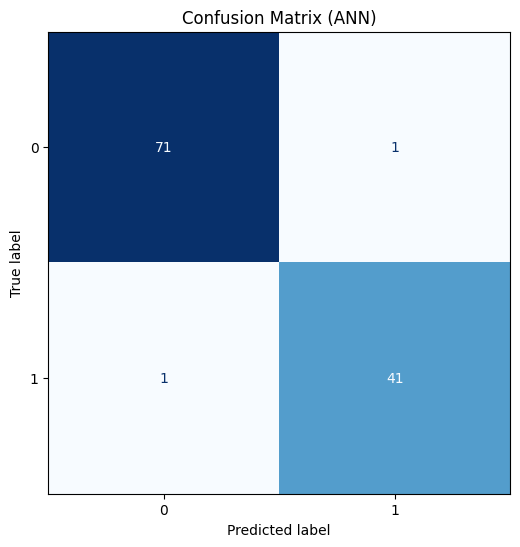

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Convert lists to numpy arrays if needed
y_true = np.array(ys)        # from evaluation cell
y_pred = np.array(ys_pred)   # from evaluation cell

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Confusion Matrix (ANN)")
plt.show()


In [ ]:
print("=== PyTorch ANN results from re-evaluation ===")
print(f"Accuracy: {accuracy_score(np.array(ys), np.array(ys_pred)):.4f}")
print(f"Precision: {precision_score(np.array(ys), np.array(ys_pred)):.4f}")
print(f"Recall: {recall_score(np.array(ys), np.array(ys_pred)):.4f}")
print(f"F1-score: {f1_score(np.array(ys), np.array(ys_pred)):.4f}")

=== PyTorch ANN results from re-evaluation ===
Accuracy: 0.9825
Precision: 0.9762
Recall: 0.9762
F1-score: 0.9762
